# DMC 2020 - Data Exploration

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pathlib

%matplotlib inline

## Laden der Daten in pandas

In [74]:
PROJECT_PATH = pathlib.Path('explore.ipnyb').parent.resolve()

In [40]:
infos_df = pd.read_csv(f'{PROJECT_PATH}/task/data/infos.csv', sep='|')
items_df = pd.read_csv(f'{PROJECT_PATH}/task/data/items.csv', sep='|')
orders_df = pd.read_csv(f'{PROJECT_PATH}/task/data/orders.csv', sep='|')

## Übersicht infos_df

In [41]:
infos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           10463 non-null  int64  
 1   simulationPrice  10463 non-null  float64
 2   promotion        1843 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 245.4+ KB


<b>Features</b>
<ul>
    <li>itemID = einzigartige ID zur Identifizierung | positive int | nominal
    <li>simulationPrice = nummerischer Wert, Preis des Produktes in der Simulationsperiode | positive float x.xx | verhältnis
    <li>promotion = Liste von Datumsangaben wann ein Produkt in der Simulationsperiode in Promotion ist | ordinal
</ul>

In [42]:
infos_df.sample(10)

,itemID,simulationPrice,promotion
3336,3337,8.16,"2018-07-02,2018-07-04"
9763,9764,282.70,2018-07-09
6059,6060,27.70,NaN
6075,6076,11.18,NaN
2031,2032,3.82,NaN
5214,5215,5.94,NaN
7526,7527,147.61,NaN
944,945,29.41,NaN
9892,9893,93.97,NaN
9778,9779,312.38,NaN


In [43]:
infos_df['simulationPrice'].describe()

count    10463.000000
mean       122.010808
std        469.701306
min          0.380000
25%          8.990000
50%         23.830000
75%         63.125000
max       9055.070000
Name: simulationPrice, dtype: float64

Da es aufgrund der Verteilung sehr viele outliers nach oben gibt erfolgt zur besseren Übersicht die Darstellung des Boxplots ohne outliers

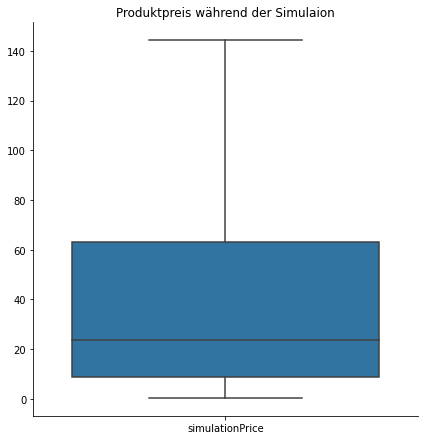

In [44]:
g = sns.catplot(data=infos_df[['simulationPrice']],kind='box',showfliers=False,  height=6, aspect=1.0)
plt.title('Produktpreis während der Simulaion')
plt.show(g)

Da der Preis sich im Simulationszeitraum nicht ändert, aber höchstwahrscheinlich ein Produkt in Promotion mehr Absatz generiert ist es für die Trainingsdaten sinnvoll herauszufinden wann ein Produkt in Promotion umso dieses Feature besser für die Prediction nutzen zu können.

## Übersicht items_df

In [45]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   itemID                  10463 non-null  int64  
 1   brand                   10463 non-null  int64  
 2   manufacturer            10463 non-null  int64  
 3   customerRating          10463 non-null  float64
 4   category1               10463 non-null  int64  
 5   category2               10463 non-null  int64  
 6   category3               10463 non-null  int64  
 7   recommendedRetailPrice  10463 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 654.1 KB


<b>Features</b>
<ul>
    <li>itemID = einzigartige ID zur Identifizierung | positive int | nominal
    <li>brand = kategorisches Attribut | positive int (0-274) wobei 0 = no brand | nominal
    <li>manufacturer = kategorisches Attribut | positive int (1-253) | nominal
    <li>customerRatin = nummerisches Attribut | positive float x.x (1-5) wobei 0 = kein Rating | ordinal
    <li>category1 = kategorisches und hierarchisches Attribut | positive int (1-8) | nominal
    <li>category2 = kategorisches und hierarchisches Attribut | positive int (1-52) | nominal
    <li>category3 = kategorisches und hierarchisches Attribut | positive int (1-8) | nominal
    <li>recommendedRetailPrice = nummerisches Attribug | positive float x.xx | verhältnis
</ul>

Es gibt 275 verschiedene Marken (wobei 274 genau identifiziert werden können) und genau 254 verschiedene Hersteller.
Jedes Produkt ist genau einer Kategorie zugeordnert welche aus drei Features besteht.
Es gibt keine missing-values.

In [46]:
items_df.head()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04


In [47]:
items_df.describe()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,5232.000000,56.108286,115.710982,1.408953,4.238077,22.506929,4.108573,118.283142
std,3020.552267,75.983983,77.269249,2.135633,2.530146,14.868889,2.534010,339.338973
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.460000
25%,2616.500000,0.000000,47.000000,0.000000,2.000000,8.000000,2.000000,13.950000
50%,5232.000000,0.000000,107.000000,0.000000,4.000000,23.000000,4.000000,24.220000
75%,7847.500000,101.000000,173.000000,4.000000,7.000000,38.000000,7.000000,67.920000
max,10463.000000,274.000000,253.000000,5.000000,8.000000,52.000000,8.000000,6955.000000


#### Feature: brand

In [48]:
brand_df = items_df[['brand', 'itemID']].groupby(['brand']).count().sort_values(by='itemID', ascending=False).apply(lambda x: 100 * x / x.sum()).rename(columns={'itemID' : 'frequency'})
brand_df

,frequency
brand,
0,50.004779
101,2.312912
82,1.892383
93,1.538756
116,1.194686
...,...
232,0.009557
135,0.009557
133,0.009557


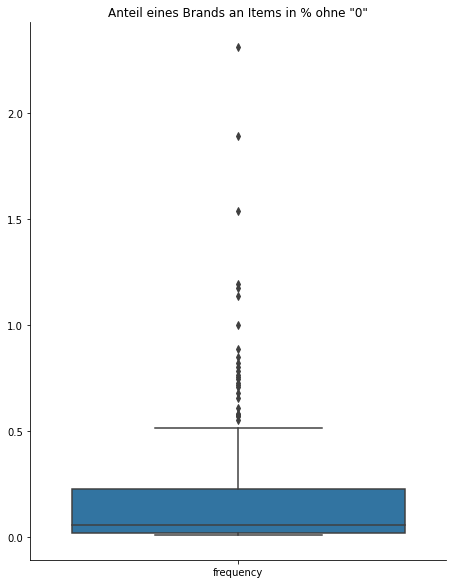

In [49]:
g = sns.catplot(data=brand_df[1:],kind='box', height=8, aspect=.8)
plt.title('Anteil eines Brands an Items in % ohne "0"')
plt.show(g)

50% der Items haben kein Brand.

#### Feature: manufacturer

In [50]:
manufacturer_df = items_df[['manufacturer', 'itemID']].groupby(['manufacturer']).count().sort_values(by='itemID', ascending=False).apply(lambda x: 100 * x / x.sum()).rename(columns={'itemID' : 'frequency'})
manufacturer_df

,frequency
manufacturer,
86,4.597152
159,4.281755
164,3.326006
2,3.278218
121,2.542292
...,...
126,0.009557
142,0.009557
130,0.009557


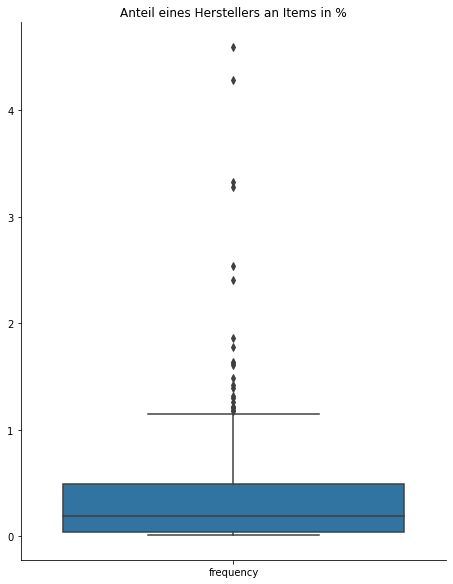

In [51]:
g = sns.catplot(data=manufacturer_df,kind='box', height=8, aspect=.8)
plt.title('Anteil eines Herstellers an Items in %')
plt.show(g)

Auch bei den Herstellern gibt es einige wenige die stärker vertreten sind.

#### Feature: customerRating

In [52]:
items_df[['customerRating', 'itemID']].groupby(['customerRating']).count().sort_values(by='itemID', ascending=False).apply(lambda x: 100 * x / x.sum()).rename(columns={'itemID' : 'frequency'})

,frequency
customerRating,
0.00,68.020644
5.00,19.879576
4.00,2.876804
3.00,1.777693
1.00,1.108669
...,...
4.28,0.009557
4.30,0.009557
4.36,0.009557


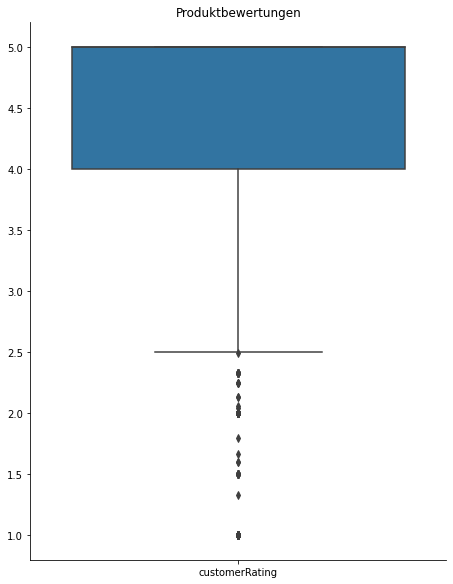

In [53]:
rating_df = items_df[['customerRating']]
g = sns.catplot(data=rating_df[items_df['customerRating'] > 0],kind='box', height=8, aspect=.8)
plt.title('Produktbewertungen')
plt.show(g)

#### Feature: category1, category2, category3

In [54]:
category_df= items_df[['itemID','category1','category2','category3']]
category_df['category'] = category_df[['category1','category2','category3']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93777/2413177595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['category'] = category_df[['category1','category2','category3']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)


In [55]:
category_df

,itemID,category1,category2,category3,category
0,1,1,1,1,1-1-1
1,2,1,2,1,1-2-1
2,3,1,3,1,1-3-1
3,4,1,2,1,1-2-1
4,5,1,1,1,1-1-1
...,...,...,...,...,...
10458,10459,8,44,8,8-44-8
10459,10460,8,44,8,8-44-8
10460,10461,8,44,8,8-44-8
10461,10462,8,44,8,8-44-8


In [56]:
category_df['category'].nunique()

75

In [57]:
cat = category_df[['category', 'itemID']].groupby(['category']).count().sort_values(by='itemID', ascending=False).apply(lambda x: 100 * x / x.sum()).rename(columns={'itemID' : 'frequency'})
cat

,frequency
category,
8-44-8,12.883494
2-8-2,10.694829
5-32-4,10.369875
1-1-1,6.126350
7-23-6,5.887413
...,...
5-21-3,0.009557
3-34-6,0.009557
3-29-4,0.009557


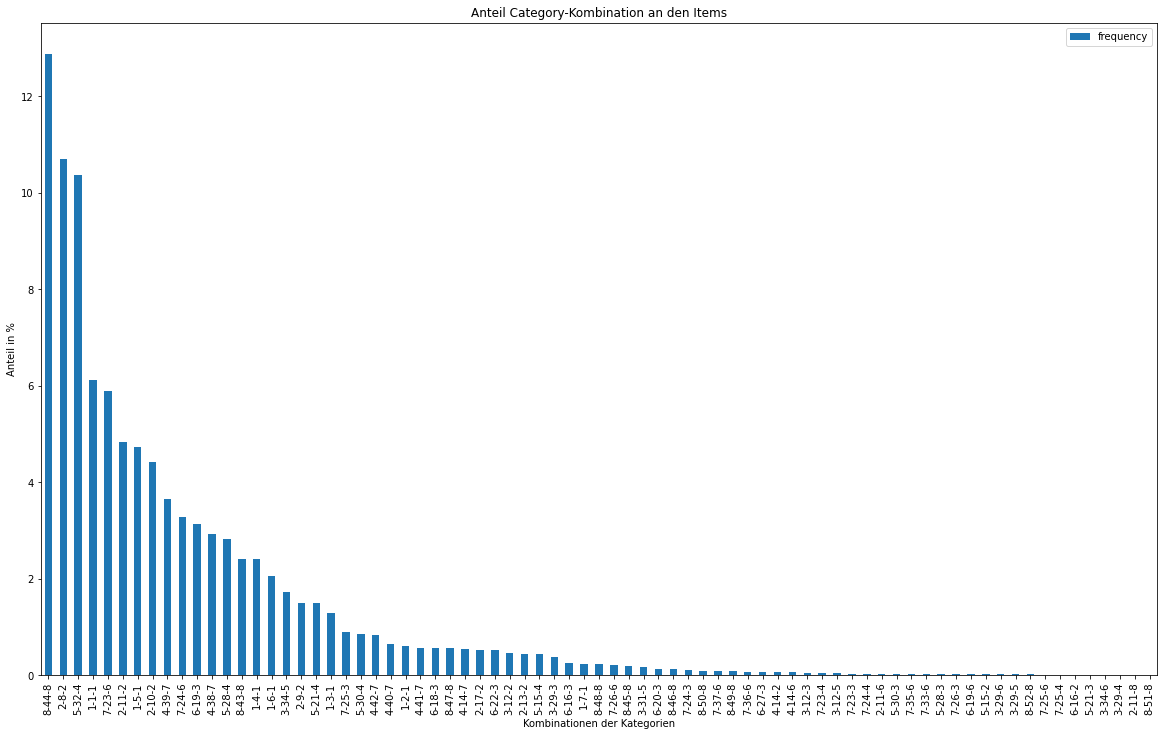

In [58]:
cat.plot(kind='bar', figsize=(20, 12))
plt.xlabel('Kombinationen der Kategorien')
plt.ylabel('Anteil in %')
plt.title('Anteil Category-Kombination an den Items')
plt.show()

#### Feature: recommendedRetailPrice

In [59]:
items_df['recommendedRetailPrice'].describe()

count    10463.000000
mean       118.283142
std        339.338973
min          2.460000
25%         13.950000
50%         24.220000
75%         67.920000
max       6955.000000
Name: recommendedRetailPrice, dtype: float64

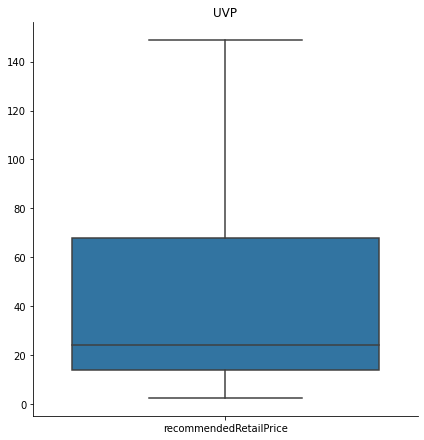

In [60]:
g = sns.catplot(data=items_df[['recommendedRetailPrice']],kind='box',showfliers=False,  height=6, aspect=1.0)
plt.title('UVP')
plt.show(g)

## Übersicht orders_df

In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181955 entries, 0 to 2181954
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   time        object 
 1   transactID  int64  
 2   itemID      int64  
 3   order       int64  
 4   salesPrice  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 83.2+ MB


<b>Features</b>
<ul>
    <li>time = exakte Zeitangabe der Order | YYYY-MM-dd hh:mm:ss | ordinal
    <li>transactID = Bestellnummer die nur für einen begrenzten Zeitraum einzigartig ist | positive int | nominal
    <li>itemID = einzigartige ID zur Identifizierung | positive int | nominal
    <li>order = Anzahl der Einheiten der Order | positive int | verhältnis
    <li>salesPrice = Verkaufspreis | positive int | verhältnis
</ul>

## Sales

#### infos_df

Das Feature promotion wird getrennt und in datetime umgewandelt

In [62]:
promo = infos_df['promotion'].str.split(',', n = 3, expand = True)

infos_df['promotion_1'] = pd.to_datetime(promo[0])
infos_df['promotion_2'] = pd.to_datetime(promo[1])
infos_df['promotion_3'] = pd.to_datetime(promo[2])

infos_df.drop(columns = ['promotion'], inplace = True)

In [63]:
infos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   itemID           10463 non-null  int64         
 1   simulationPrice  10463 non-null  float64       
 2   promotion_1      1843 non-null   datetime64[ns]
 3   promotion_2      190 non-null    datetime64[ns]
 4   promotion_3      33 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 408.8 KB


#### order_df

In [64]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181955 entries, 0 to 2181954
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   time        object 
 1   transactID  int64  
 2   itemID      int64  
 3   order       int64  
 4   salesPrice  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 83.2+ MB


Das Feature time wird in datetime umgewandelt sowie mehrere Informationen werden aus dem Datum angehängt

In [65]:
orders_df['full-date'] = pd.to_datetime(orders_df['time'])
orders_df['date'] = orders_df['full-date'].dt.date
orders_df['time'] = orders_df['full-date'].dt.time
orders_df['week'] = orders_df['full-date'].dt.week
orders_df['dayofweek'] = orders_df['full-date'].dt.dayofweek
orders_df['month'] = orders_df['full-date'].dt.month
orders_df['date'] = orders_df['full-date'].dt.date

orders_df['date'] = pd.to_datetime(orders_df['date'])

orders_df.drop(columns=['time'], inplace = True)

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93777/279493405.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders_df['week'] = orders_df['full-date'].dt.week


Der Umsatz für jede einzelne Position wird berechnet

In [66]:
orders_df['sales'] = orders_df['order']*orders_df['salesPrice']

### Merging der drei DataFrames

In [67]:
sales_df = orders_df.merge(items_df, left_on='itemID', right_on='itemID').merge(infos_df, left_on='itemID', right_on='itemID')
sales_df.sort_values('full-date', inplace = True)

In [68]:
sales_df.head()

,transactID,itemID,order,salesPrice,full-date,date,week,dayofweek,month,sales,...,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,promotion_1,promotion_2,promotion_3
0,2278968,450,1,17.42,2018-01-01 00:01:56,2018-01-01,1,0,1,17.42,...,7,0.00,1,2,1,27.00,17.42,NaT,NaT,NaT
149,2278968,83,1,5.19,2018-01-01 00:01:56,2018-01-01,1,0,1,5.19,...,4,0.00,1,1,1,12.89,5.19,NaT,NaT,NaT
324,2255797,7851,2,20.47,2018-01-01 00:07:11,2018-01-01,1,0,1,40.94,...,202,4.75,4,39,7,11.75,20.47,NaT,NaT,NaT
1,2278968,450,1,17.42,2018-01-01 00:09:24,2018-01-01,1,0,1,17.42,...,7,0.00,1,2,1,27.00,17.42,NaT,NaT,NaT
150,2278968,83,1,5.19,2018-01-01 00:09:24,2018-01-01,1,0,1,5.19,...,4,0.00,1,1,1,12.89,5.19,NaT,NaT,NaT


Text(0.5, 1.0, 'verkaufte Stückzahl pro Monat')

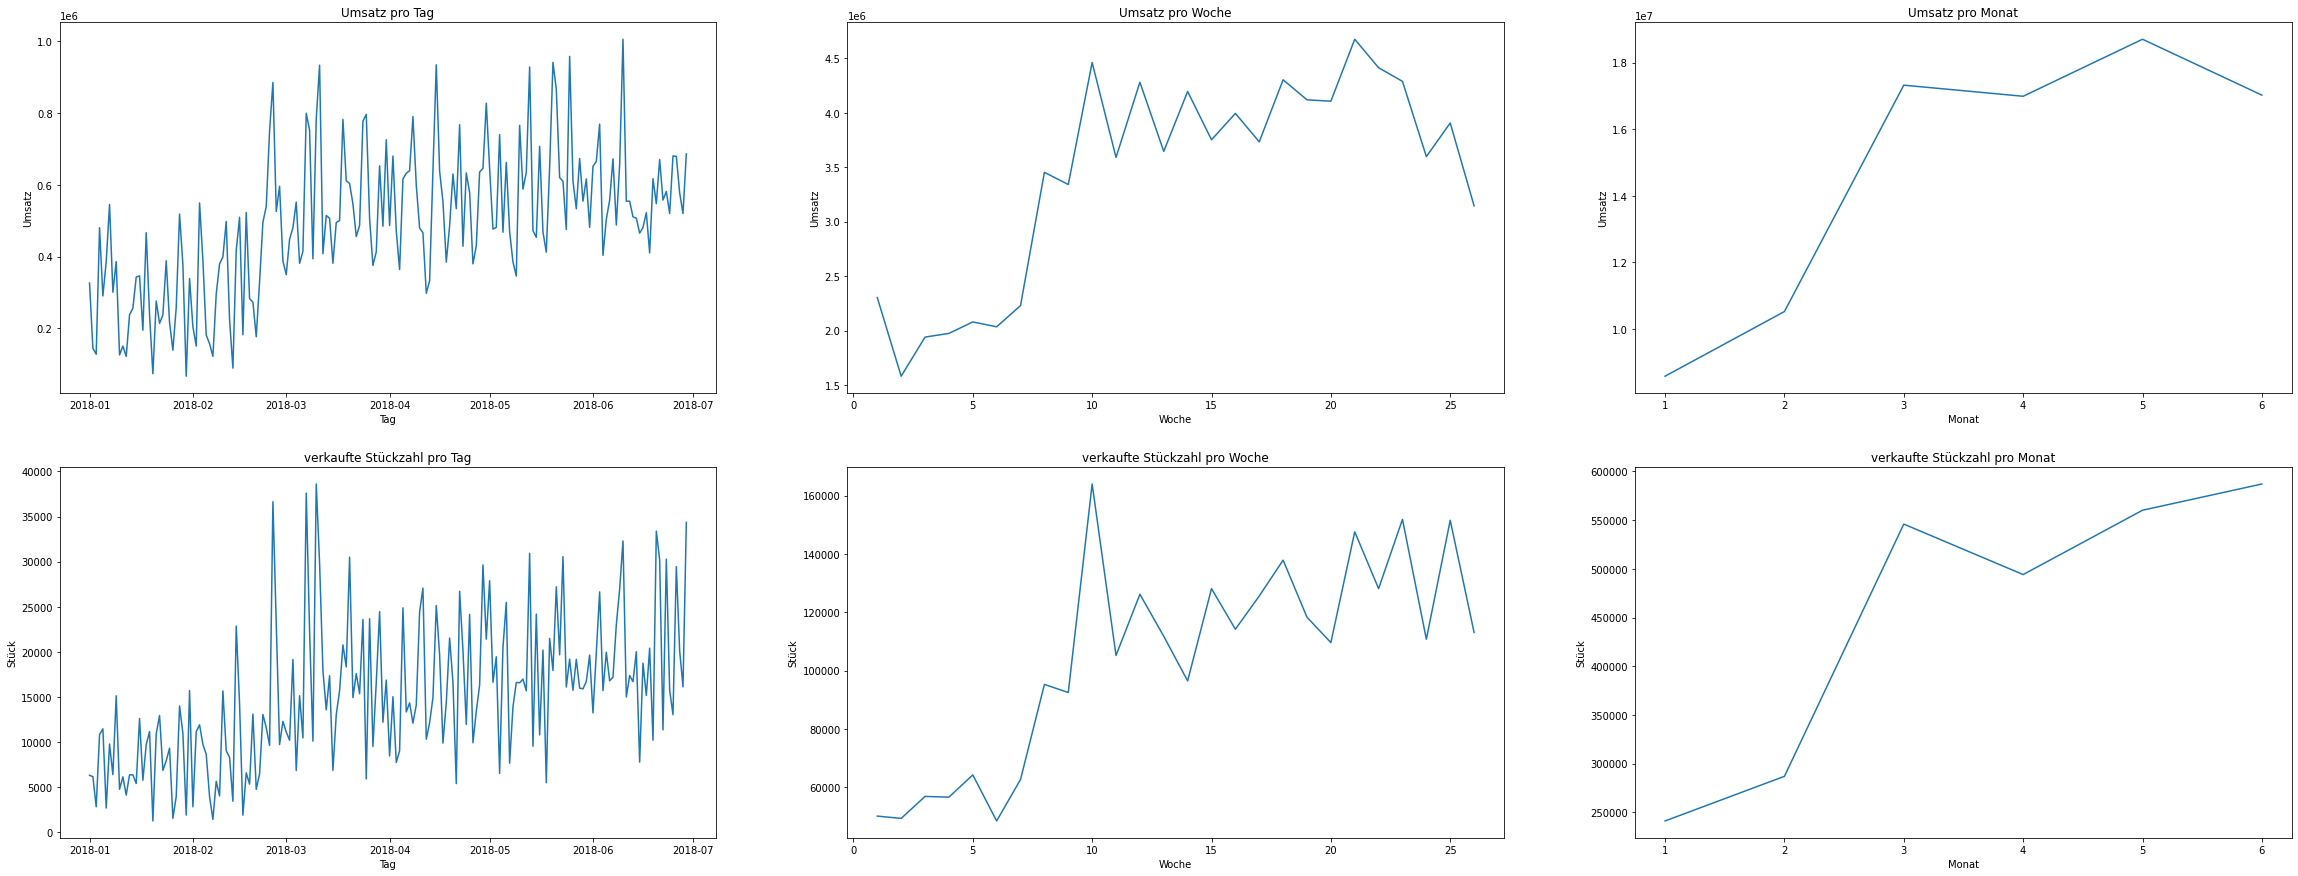

In [69]:
plt.figure(figsize=(40,15))

plt.subplot(231)
plt.plot(sales_df[['date','sales']].groupby('date').sum())
plt.xlabel('Tag')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Tag')

plt.subplot(232)
plt.plot(sales_df[['week','sales']].groupby('week').sum())
plt.xlabel('Woche')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Woche')

plt.subplot(233)
plt.plot(sales_df[['month','sales']].groupby('month').sum())
plt.xlabel('Monat')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Monat')

plt.subplot(234)
plt.plot(sales_df[['date','order']].groupby('date').sum())
plt.xlabel('Tag')
plt.ylabel('Stück')
plt.title('verkaufte Stückzahl pro Tag')

plt.subplot(235)
plt.plot(sales_df[['week','order']].groupby('week').sum())
plt.xlabel('Woche')
plt.ylabel('Stück')
plt.title('verkaufte Stückzahl pro Woche')

plt.subplot(236)
plt.plot(sales_df[['month','order']].groupby('month').sum())
plt.xlabel('Monat')
plt.ylabel('Stück')
plt.title('verkaufte Stückzahl pro Monat')

Ab Februar steigt der Umsatz stark - Gründe dafür sollten erörtert werden

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

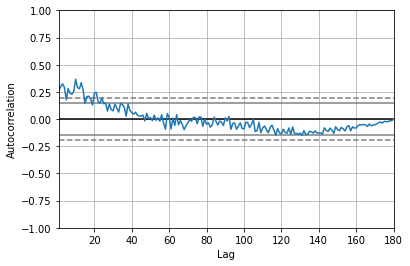

In [36]:
 pd.plotting.autocorrelation_plot(sales_df[['date','order']].groupby('date').sum())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

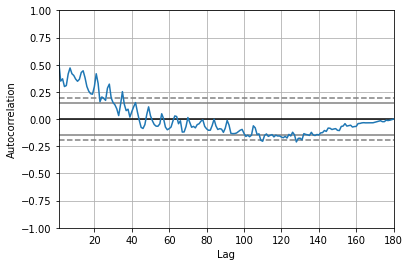

In [37]:
 pd.plotting.autocorrelation_plot(sales_df[['date','sales']].groupby('date').sum())

array([<AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>],
      dtype=object)

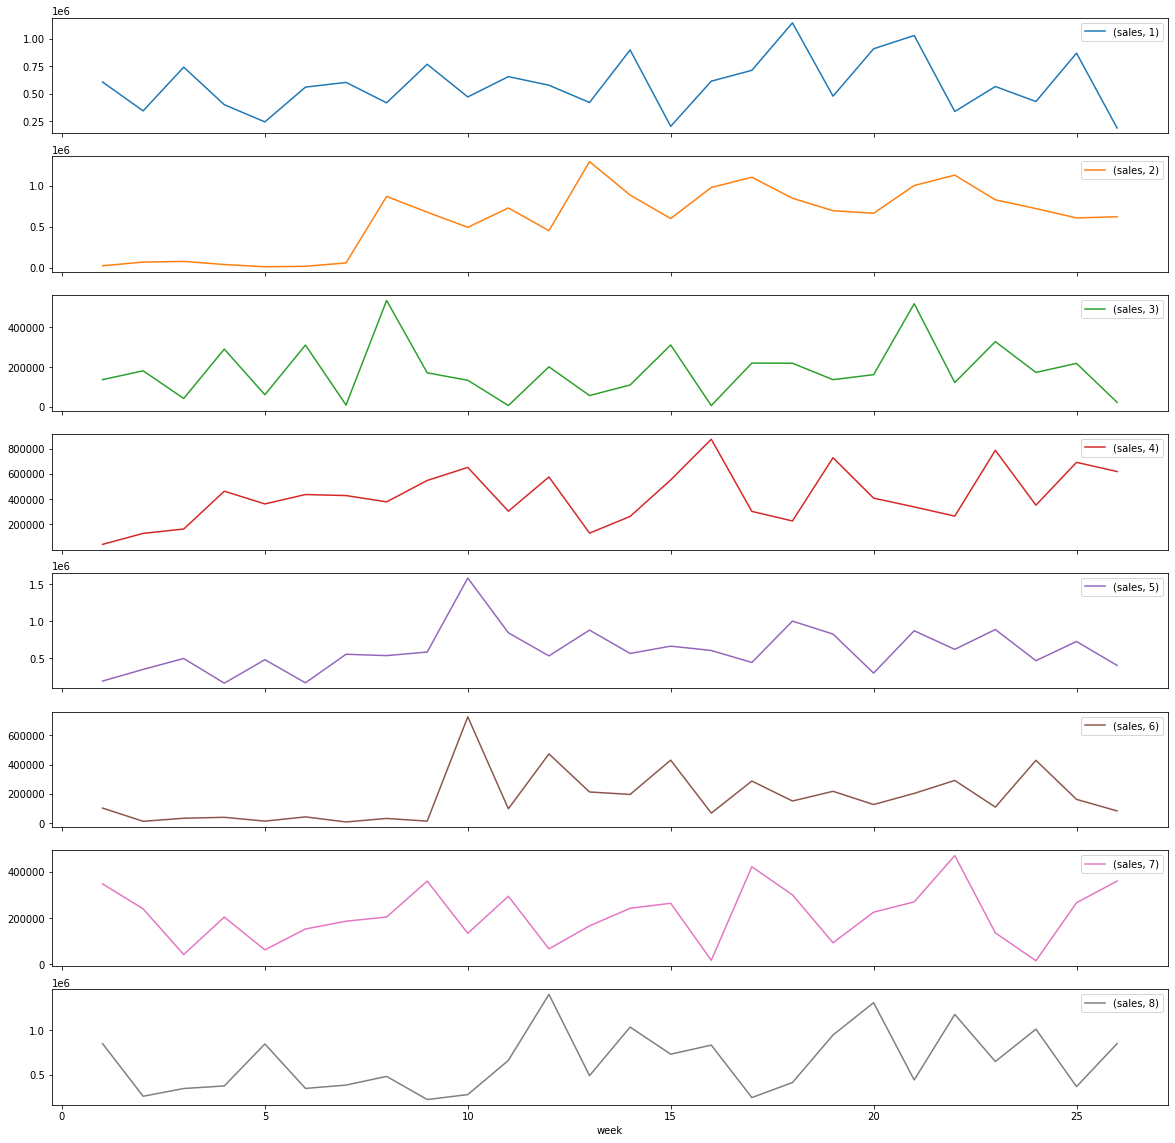

In [70]:
sales_df[['week','sales','category1']].groupby(['week','category1']).sum().unstack().plot(figsize=(20,20), subplots = True)

<AxesSubplot:xlabel='None-category1', ylabel='None-category1'>

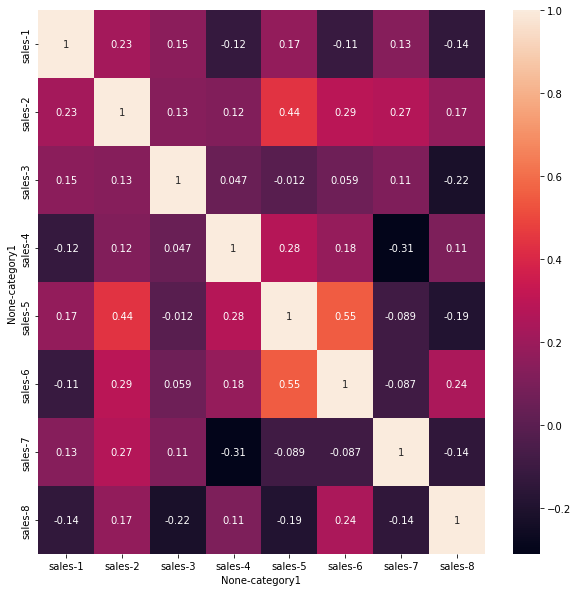

In [71]:
plt.subplots(figsize=(10,10))
sns.heatmap(sales_df[['week','sales','category1']].groupby(['week','category1']).sum().unstack().corr(), annot = True)

<AxesSubplot:xlabel='dayofweek'>

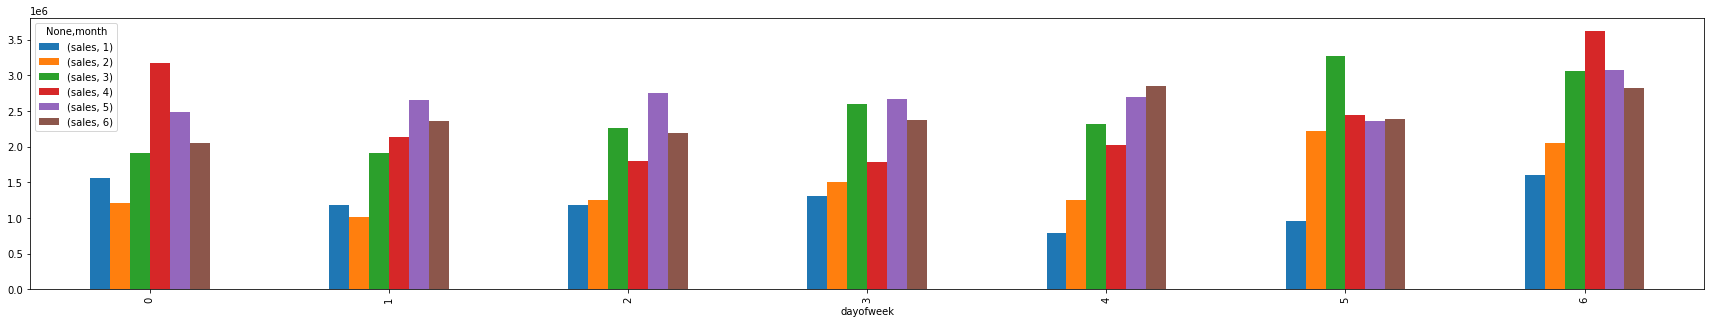

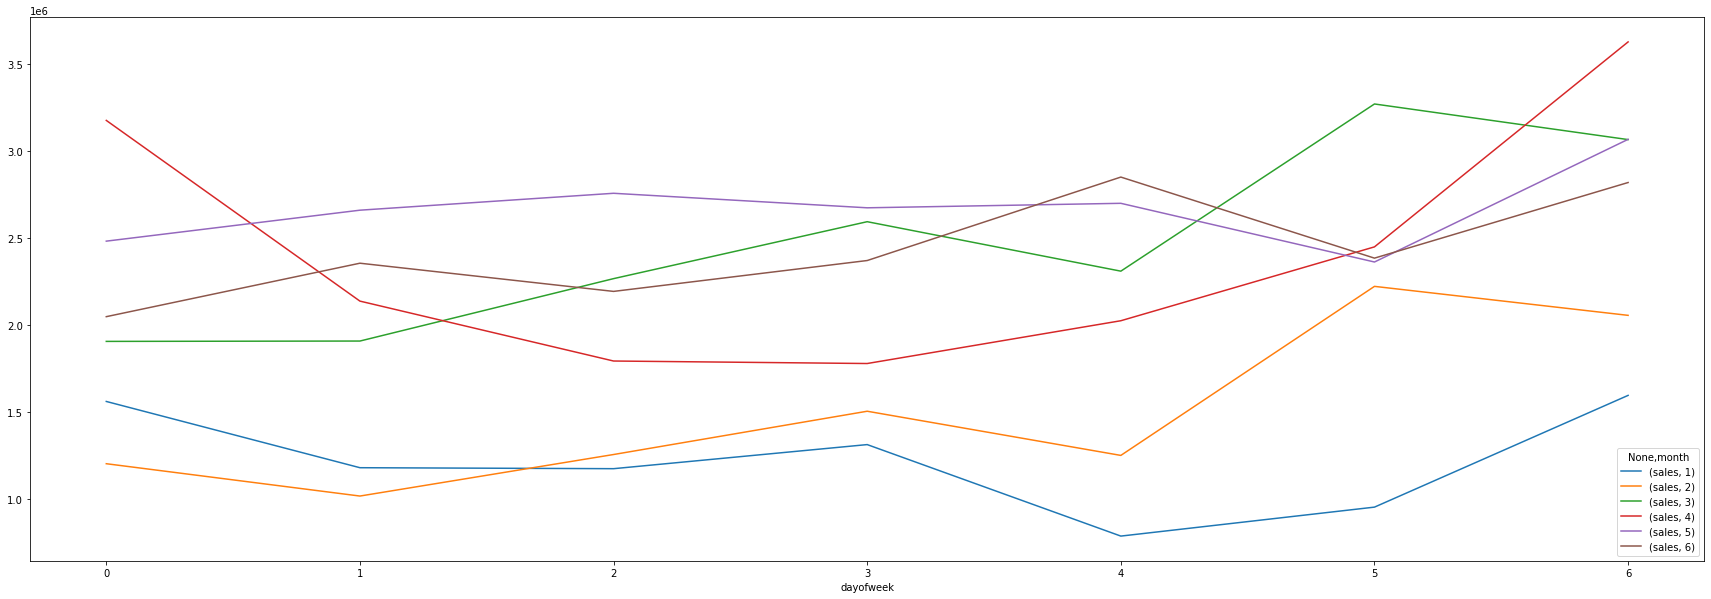

In [72]:
sales_df[['dayofweek' , 'month','sales']].groupby(['dayofweek','month']) .sum().unstack().plot(kind = 'bar',figsize=(30,5))
sales_df[['dayofweek' , 'month','sales']].groupby(['dayofweek','month']).sum().unstack().plot(kind = 'line',figsize=(30,10))